In [1]:
import gym
import sys

sys.path.append("/Users/chriswang/Downloads/sepsis2/rlsepsis234/gym_sepsis")
sys.path.append("/Users/chriswang/Downloads/amir/baselines")
from baselines import deepq
from baselines import bench
from baselines import logger
from baselines.common.atari_wrappers import make_atari
from baselines.common import models

import gym_sepsis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
logger.configure("dqn-log")
env = gym.make("sepsis-bayesian-vae-v0")
model = deepq.learn(
    env=env,
    prioritized_replay=True,
    checkpoint_path="dqn-ckpt{}".format(time.time()),
    seed=1,
    total_timesteps=10000,
    network=models.mlp(num_hidden=128, num_layers=2),
)

model.save('dqn.model')
env.close()

Logging to dqn-log


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Tensor("z/random_normal:0", shape=(?, 30), dtype=float32)
Tensor("z_1/random_normal:0", shape=(?, 30), dtype=float32)
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use keras.layers.flatten instead.
--------------------------------------
| % time spent exploring  | 88       |
| episodes                | 100      |
| mean 100 episode reward | -677     |
| steps                   | 114      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 77       |
| episodes                | 200      |
| mean 100 episode reward | -820     |
| steps                   | 231      |
--------------------------------------
--------------------------------------
| % time spent exploring  | 65       |
| episodes                | 300      |
| mean 100 episode reward | -600     |
| steps                   | 3

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3.1e+03  |
| mean 100 episode reward | -460     |
| steps                   | 4.47e+03 |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3.2e+03  |
| mean 100 episode reward | -480     |
| steps                   | 4.62e+03 |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3.3e+03  |
| mean 100 episode reward | -460     |
| steps                   | 4.76e+03 |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3.4e+03  |
| mean 100 episode reward | -540     |
| steps                   | 4.9e+03  |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 6.7e+03  |
| mean 100 episode reward | -540     |
| steps                   | 9.91e+03 |
--------------------------------------


In [3]:
test_data = pd.read_csv("/Users/chriswang/Downloads/sepsis2/rlsepsis234/data/test_state_action_reward_df.csv")

In [4]:
rewards = []
steps = []
actions = []

for i in range(2000):
    if i%1 == 0 and i>0:
        print("Done with %d steps..." % i)
    obs, done = env.reset(), False
    episode_rew = 0
    total_steps = 0
    while not done:
        action = model(obs[None])[0]
        actions.append(action)
        obs, rew, done, _ = env.step(action)
        episode_rew += rew
        total_steps += 1
    rewards.append(episode_rew)
    steps.append(total_steps)

Done with 1 steps...
Done with 2 steps...
Done with 3 steps...
Done with 4 steps...
Done with 5 steps...
Done with 6 steps...
Done with 7 steps...
Done with 8 steps...
Done with 9 steps...
Done with 10 steps...
Done with 11 steps...
Done with 12 steps...
Done with 13 steps...
Done with 14 steps...
Done with 15 steps...
Done with 16 steps...
Done with 17 steps...
Done with 18 steps...
Done with 19 steps...
Done with 20 steps...
Done with 21 steps...
Done with 22 steps...
Done with 23 steps...
Done with 24 steps...
Done with 25 steps...
Done with 26 steps...
Done with 27 steps...
Done with 28 steps...
Done with 29 steps...
Done with 30 steps...
Done with 31 steps...
Done with 32 steps...
Done with 33 steps...
Done with 34 steps...
Done with 35 steps...
Done with 36 steps...
Done with 37 steps...
Done with 38 steps...
Done with 39 steps...
Done with 40 steps...
Done with 41 steps...
Done with 42 steps...
Done with 43 steps...
Done with 44 steps...
Done with 45 steps...
Done with 46 steps.

Done with 362 steps...
Done with 363 steps...
Done with 364 steps...
Done with 365 steps...
Done with 366 steps...
Done with 367 steps...
Done with 368 steps...
Done with 369 steps...
Done with 370 steps...
Done with 371 steps...
Done with 372 steps...
Done with 373 steps...
Done with 374 steps...
Done with 375 steps...
Done with 376 steps...
Done with 377 steps...
Done with 378 steps...
Done with 379 steps...
Done with 380 steps...
Done with 381 steps...
Done with 382 steps...
Done with 383 steps...
Done with 384 steps...
Done with 385 steps...
Done with 386 steps...
Done with 387 steps...
Done with 388 steps...
Done with 389 steps...
Done with 390 steps...
Done with 391 steps...
Done with 392 steps...
Done with 393 steps...
Done with 394 steps...
Done with 395 steps...
Done with 396 steps...
Done with 397 steps...
Done with 398 steps...
Done with 399 steps...
Done with 400 steps...
Done with 401 steps...
Done with 402 steps...
Done with 403 steps...
Done with 404 steps...
Done with 4

Done with 724 steps...
Done with 725 steps...
Done with 726 steps...
Done with 727 steps...
Done with 728 steps...
Done with 729 steps...
Done with 730 steps...
Done with 731 steps...
Done with 732 steps...
Done with 733 steps...
Done with 734 steps...
Done with 735 steps...
Done with 736 steps...
Done with 737 steps...
Done with 738 steps...
Done with 739 steps...
Done with 740 steps...
Done with 741 steps...
Done with 742 steps...
Done with 743 steps...
Done with 744 steps...
Done with 745 steps...
Done with 746 steps...
Done with 747 steps...
Done with 748 steps...
Done with 749 steps...
Done with 750 steps...
Done with 751 steps...
Done with 752 steps...
Done with 753 steps...
Done with 754 steps...
Done with 755 steps...
Done with 756 steps...
Done with 757 steps...
Done with 758 steps...
Done with 759 steps...
Done with 760 steps...
Done with 761 steps...
Done with 762 steps...
Done with 763 steps...
Done with 764 steps...
Done with 765 steps...
Done with 766 steps...
Done with 7

Done with 1081 steps...
Done with 1082 steps...
Done with 1083 steps...
Done with 1084 steps...
Done with 1085 steps...
Done with 1086 steps...
Done with 1087 steps...
Done with 1088 steps...
Done with 1089 steps...
Done with 1090 steps...
Done with 1091 steps...
Done with 1092 steps...
Done with 1093 steps...
Done with 1094 steps...
Done with 1095 steps...
Done with 1096 steps...
Done with 1097 steps...
Done with 1098 steps...
Done with 1099 steps...
Done with 1100 steps...
Done with 1101 steps...
Done with 1102 steps...
Done with 1103 steps...
Done with 1104 steps...
Done with 1105 steps...
Done with 1106 steps...
Done with 1107 steps...
Done with 1108 steps...
Done with 1109 steps...
Done with 1110 steps...
Done with 1111 steps...
Done with 1112 steps...
Done with 1113 steps...
Done with 1114 steps...
Done with 1115 steps...
Done with 1116 steps...
Done with 1117 steps...
Done with 1118 steps...
Done with 1119 steps...
Done with 1120 steps...
Done with 1121 steps...
Done with 1122 s

Done with 1426 steps...
Done with 1427 steps...
Done with 1428 steps...
Done with 1429 steps...
Done with 1430 steps...
Done with 1431 steps...
Done with 1432 steps...
Done with 1433 steps...
Done with 1434 steps...
Done with 1435 steps...
Done with 1436 steps...
Done with 1437 steps...
Done with 1438 steps...
Done with 1439 steps...
Done with 1440 steps...
Done with 1441 steps...
Done with 1442 steps...
Done with 1443 steps...
Done with 1444 steps...
Done with 1445 steps...
Done with 1446 steps...
Done with 1447 steps...
Done with 1448 steps...
Done with 1449 steps...
Done with 1450 steps...
Done with 1451 steps...
Done with 1452 steps...
Done with 1453 steps...
Done with 1454 steps...
Done with 1455 steps...
Done with 1456 steps...
Done with 1457 steps...
Done with 1458 steps...
Done with 1459 steps...
Done with 1460 steps...
Done with 1461 steps...
Done with 1462 steps...
Done with 1463 steps...
Done with 1464 steps...
Done with 1465 steps...
Done with 1466 steps...
Done with 1467 s

Done with 1774 steps...
Done with 1775 steps...
Done with 1776 steps...
Done with 1777 steps...
Done with 1778 steps...
Done with 1779 steps...
Done with 1780 steps...
Done with 1781 steps...
Done with 1782 steps...
Done with 1783 steps...
Done with 1784 steps...
Done with 1785 steps...
Done with 1786 steps...
Done with 1787 steps...
Done with 1788 steps...
Done with 1789 steps...
Done with 1790 steps...
Done with 1791 steps...
Done with 1792 steps...
Done with 1793 steps...
Done with 1794 steps...
Done with 1795 steps...
Done with 1796 steps...
Done with 1797 steps...
Done with 1798 steps...
Done with 1799 steps...
Done with 1800 steps...
Done with 1801 steps...
Done with 1802 steps...
Done with 1803 steps...
Done with 1804 steps...
Done with 1805 steps...
Done with 1806 steps...
Done with 1807 steps...
Done with 1808 steps...
Done with 1809 steps...
Done with 1810 steps...
Done with 1811 steps...
Done with 1812 steps...
Done with 1813 steps...
Done with 1814 steps...
Done with 1815 s

In [5]:
steps = np.array(steps) 

Text(0.5, 1.0, 'Learned Policy Episode Length (DQN)')

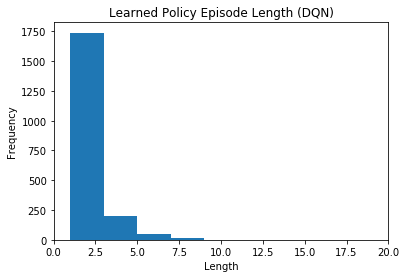

In [13]:
plt.hist(steps, bins=4)
plt.xlim([0, 20])
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Learned Policy Episode Length (DQN)")

Text(0.5, 1.0, "Physician's Policy Episode Length")

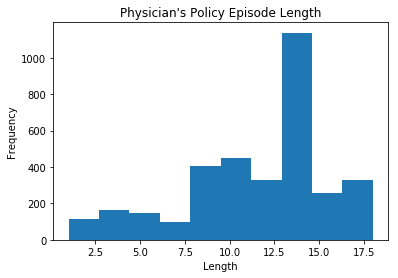

In [7]:

plt.hist(test_data.groupby(['subject_id','hadm_id',  'icustay_id']).count()["BUN"].values)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Physician's Policy Episode Length")

Text(0.5, 1.0, "Physician's Policy Episode Rewards")

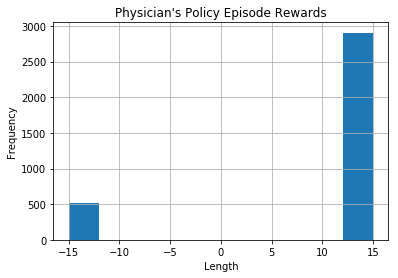

In [8]:
test_data.groupby(['subject_id','hadm_id',  'icustay_id']).sum()["reward"].hist()
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Physician's Policy Episode Rewards")

Text(0.5, 1.0, 'Learned Policy Episode Rewards (DQN)')

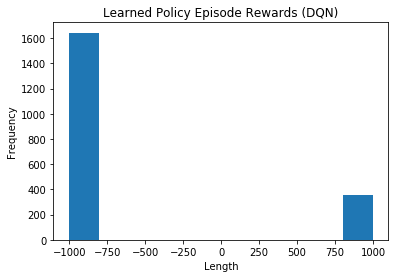

In [9]:
plt.hist(rewards)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Learned Policy Episode Rewards (DQN)")

Text(0.5, 1.0, "Learned Policy's Actions (DQN)")

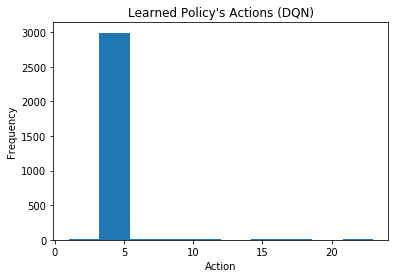

In [10]:
plt.hist(actions)
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.title("Learned Policy's Actions (DQN)")

Text(0.5, 1.0, "Physician Policy's Actions")

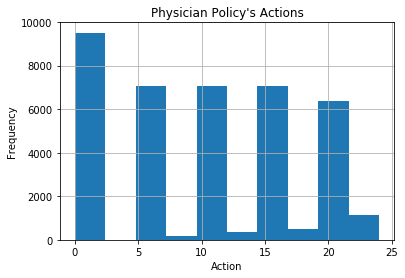

In [11]:
test_data["discrete_action"].hist()
plt.xlabel("Action")
plt.ylabel("Frequency")
plt.title("Physician Policy's Actions")

In [12]:
columns = ['ALBUMIN', 'ANION GAP', 'BANDS', 'BICARBONATE',
       'BILIRUBIN', 'BUN', 'CHLORIDE', 'CREATININE', 'DiasBP', 'Glucose',
       'GLUCOSE', 'HeartRate', 'HEMATOCRIT', 'HEMOGLOBIN', 'INR', 'LACTATE',
       'MeanBP', 'PaCO2', 'PLATELET', 'POTASSIUM', 'PT', 'PTT', 'RespRate',
       'SODIUM', 'SpO2', 'SysBP', 'TempC', 'WBC', 'age', 'is_male',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'height',
       'weight', 'vent', 'sofa', 'lods', 'sirs', 'qsofa', 'qsofa_sysbp_score',
       'qsofa_gcs_score', 'qsofa_resprate_score', 'elixhauser_hospital',
       'blood_culture_positive']

